In [25]:
# Input data files
import os
for dirname, _, filenames in os.walk('../Fruit_Vegetable_Recognition/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Fruit_Vegetable_Recognition/data\test\apple\Image_1.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_10.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_2.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_3.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_4.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_5.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_6.JPG
../Fruit_Vegetable_Recognition/data\test\apple\Image_7.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_8.jpg
../Fruit_Vegetable_Recognition/data\test\apple\Image_9.jpg
../Fruit_Vegetable_Recognition/data\test\banana\Image_1.jpg
../Fruit_Vegetable_Recognition/data\test\banana\Image_10.jpg
../Fruit_Vegetable_Recognition/data\test\banana\Image_2.jpg
../Fruit_Vegetable_Recognition/data\test\banana\Image_3.jpg
../Fruit_Vegetable_Recognition/data\test\banana\Image_4.jpg
../Fruit_Vegetable_Recognition/data\test\banana\Image_5.jpg
../Fruit_Vegetable_Recognition/data\test\banana\

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
print(tf.__version__)

2.15.0


In [27]:
# Create a list with the filepaths for training and testing
train_dir = Path('../Fruit_Vegetable_Recognition/data/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [28]:
test_dir = Path('../Fruit_Vegetable_Recognition/data/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [29]:
val_dir = Path('../Fruit_Vegetable_Recognition/data/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [30]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures """
    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [31]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [32]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['capsicum' 'pomegranate' 'eggplant' 'grapes' 'garlic' 'mango' 'soy beans'
 'orange' 'paprika' 'pear' 'onion' 'peas' 'jalepeno' 'apple' 'cucumber'
 'cabbage' 'tomato' 'banana' 'sweetpotato' 'spinach' 'chilli pepper'
 'watermelon' 'turnip' 'lettuce' 'sweetcorn' 'corn' 'ginger' 'carrot'
 'bell pepper' 'cauliflower' 'pineapple' 'kiwi' 'lemon' 'potato'
 'beetroot' 'raddish']


In [33]:
train_df.head(5)

,Filepath,Label
0,..\Fruit_Vegetable_Recognition\data\train\caps...,capsicum
1,..\Fruit_Vegetable_Recognition\data\train\pome...,pomegranate
2,..\Fruit_Vegetable_Recognition\data\train\eggp...,eggplant
3,..\Fruit_Vegetable_Recognition\data\train\grap...,grapes
4,..\Fruit_Vegetable_Recognition\data\train\garl...,garlic


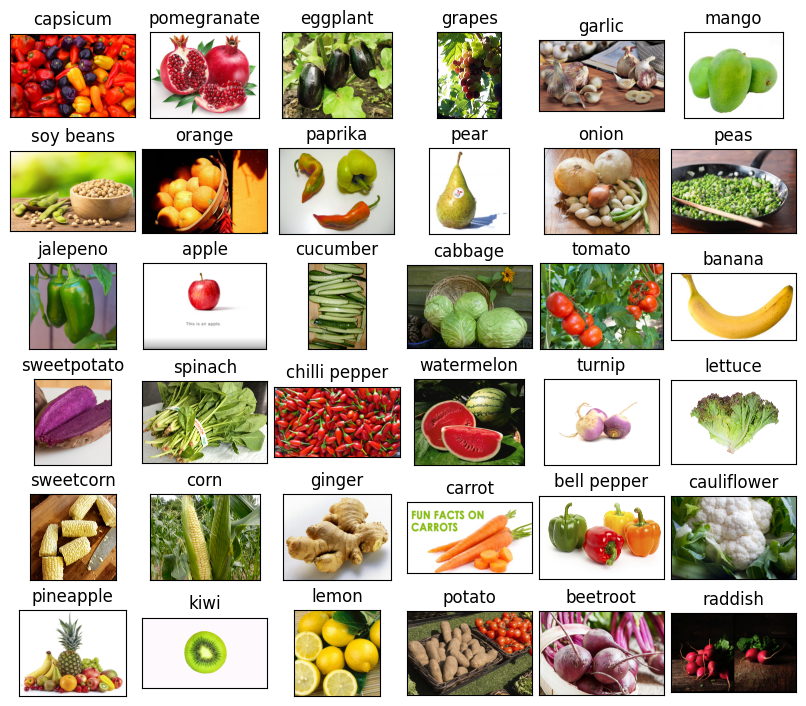

In [34]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [35]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [36]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [37]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [38]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [39]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [40]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
90/90 [==============================] - 98s 1s/step - loss: 1.7942 - accuracy: 0.5201 - val_loss: 0.4774 - val_accuracy: 0.8559
Epoch 2/5
90/90 [==============================] - ETA: 0s - loss: 0.5498 - accuracy: 0.8291

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 9s 776ms/step


['lemon',
 'orange',
 'beetroot',
 'ginger',
 'sweetcorn',
 'lettuce',
 'pineapple',
 'cabbage',
 'lettuce',
 'kiwi',
 'cabbage',
 'paprika',
 'pomegranate',
 'cauliflower',
 'onion',
 'cucumber',
 'apple',
 'garlic',
 'pomegranate',
 'grapes',
 'lettuce',
 'cauliflower',
 'orange',
 'apple',
 'jalepeno',
 'corn',
 'chilli pepper',
 'paprika',
 'carrot',
 'watermelon',
 'mango',
 'sweetpotato',
 'eggplant',
 'raddish',
 'pear',
 'grapes',
 'pomegranate',
 'cucumber',
 'lettuce',
 'pomegranate',
 'jalepeno',
 'onion',
 'capsicum',
 'pineapple',
 'carrot',
 'pear',
 'bell pepper',
 'tomato',
 'corn',
 'turnip',
 'cauliflower',
 'pomegranate',
 'paprika',
 'lettuce',
 'soy beans',
 'beetroot',
 'garlic',
 'sweetpotato',
 'bell pepper',
 'sweetcorn',
 'apple',
 'banana',
 'lemon',
 'watermelon',
 'beetroot',
 'mango',
 'corn',
 'lemon',
 'jalepeno',
 'raddish',
 'pineapple',
 'soy beans',
 'kiwi',
 'ginger',
 'apple',
 'potato',
 'watermelon',
 'sweetcorn',
 'kiwi',
 'paprika',
 'capsicum'

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output('../Fruit_Vegetable_Recognition/data/validation/apple/Image_1.jpg')
img

1/1 [==============================] - 1s 872ms/step


'cabbage'

In [ ]:
model.save('FV.h5')

c:\Users\hvthy\anaconda3\envs\tf\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
